# ripe or rotten mango?

### imports

En esta sección se instalan las dependencias e importan las librerías necesarias para manipulación de datos, preprocesamiento, visualización y modelos de machine learning.

In [1]:
%reload_ext autoreload
%autoreload 2
%pip install -q -r ../requirements.txt

import sys
sys.path.append('../')  

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import pandas as pd 
from src.data import get_dataset, preprocess, graphic
from src.model import mv_regression, decision_tree, random_forest, neural_network, deep_neural_network

Note: you may need to restart the kernel to use updated packages.


### manejo de datos

Se descarga el conjunto de datos o en su defecto se carga de un archivo `train.csv` y creamos un DataFrame con los datos de entrenamiento para una inspección y análisis inicial.

In [2]:
dataset = get_dataset()
train_data = pd.DataFrame(dataset.train_data)
print(f"Train dataset shape: {train_data.shape}")

Loaded dataset ../data/raw\train.csv in 0.04 seconds.
Loaded dataset ../data/raw\validation.csv in 0.01 seconds.
Train dataset shape: (1989, 2)


### feature engineering

Inicializamos el preprocesamiento a partir del conjunto de datos de entrenamiento para extraer características y aplicar PCA, organizando los resultados en los DataFrames `features_data` y `pca_data` para su análisis y modelado posterior.

In [3]:
processor = preprocess(dataset.train_data)

features_data = pd.DataFrame(processor.features_data)
print(f"Features shape: {features_data.shape}")
features_data.describe()

Loaded dataset ../data/processed\features.csv in 1.50 seconds.
Loaded dataset ../data/processed\pca.csv in 0.03 seconds.
Features shape: (1989, 775)


,area,mean_r,mean_g,mean_b,std_dev_r,std_dev_g,std_dev_b,hist_0,hist_1,hist_2,...,hist_758,hist_759,hist_760,hist_761,hist_762,hist_763,hist_764,hist_765,hist_766,hist_767
count,1.989000e+03,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,...,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,6.685059e+04,181.854046,155.196007,126.786020,26.639887,27.660354,36.437425,0.295123,0.091503,0.076923,...,25.862242,34.162896,25.896430,33.275013,39.687783,50.937657,53.144796,66.493213,218.011564,874.575163
std,8.864969e+04,34.294345,38.557030,45.728988,10.555681,10.600771,17.150335,2.651806,1.208485,0.809660,...,155.273770,251.887797,101.293353,146.106492,123.184643,469.349899,336.739000,451.837125,1231.088768,4440.192961
min,1.083000e+03,76.756836,67.474856,14.339593,3.827603,5.637942,7.884951,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.530400e+04,153.235232,130.185822,92.556163,18.003269,20.049799,22.960395,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.800500e+04,177.447050,150.294597,128.293459,26.102443,25.818547,34.824957,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.991000e+04,205.149231,177.272506,150.121064,32.858022,32.503474,45.783679,0.000000,0.000000,0.000000,...,7.000000,5.000000,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,3.000000,13.000000
max,1.272680e+06,254.209087,253.923098,252.875468,76.380757,104.556292,116.152947,53.000000,45.000000,23.000000,...,4188.000000,6895.000000,2542.000000,2699.000000,1415.000000,16237.000000,13600.000000,14016.000000,36807.000000,40262.000000


In [4]:
pca_data = pd.DataFrame(processor.pca_data)
print(f"PCA features shape: {pca_data.shape}")
pca_data.describe()

PCA features shape: (1989, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,1989.000000,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03
mean,0.000000,5.715779e-17,-7.144723e-18,-6.858934e-16,-1.714734e-16,2.286311e-16,8.002090e-16,1.000261e-15,4.572623e-16,1.028840e-15,6.358804e-16,-1.943365e-15,-5.144201e-16,-4.858412e-16,-5.715779e-17,-1.486102e-15,-8.573668e-17,4.001045e-16,-4.001045e-16
std,1.000251,1.624472e+00,1.382951e+00,1.100234e+01,1.022334e+01,7.996838e+00,6.566725e+00,6.121897e+00,5.698542e+00,5.421977e+00,4.841078e+00,4.401756e+00,4.320416e+00,4.214642e+00,3.826726e+00,3.771764e+00,3.473476e+00,3.198670e+00,3.119659e+00
min,-0.742068,-3.344345e+00,-5.378656e+00,-2.707418e+01,-1.615096e+01,-1.421712e+01,-2.815532e+01,-9.306890e+01,-4.364580e+01,-4.613375e+01,-3.060390e+01,-3.251625e+01,-5.926344e+01,-3.641846e+01,-2.048500e+01,-1.906860e+01,-2.450132e+01,-2.836493e+01,-1.590129e+01
25%,-0.468778,-1.089600e+00,-5.905019e-01,-7.940474e+00,-4.326469e+00,-4.335032e+00,-4.549376e+00,-3.362696e+00,-2.384659e+00,-3.437807e+00,-1.180830e+00,-1.598971e+00,-1.523253e+00,-1.553431e+00,-1.231905e+00,-1.575245e+00,-1.184247e+00,-1.095265e+00,-1.396728e+00
50%,-0.212638,-1.001513e-01,7.398179e-02,-3.461190e+00,-3.044794e+00,-2.038845e+00,-7.364197e-01,-6.080667e-01,-7.631862e-01,4.096188e-01,3.112870e-01,2.793063e-01,7.530662e-02,-3.360125e-01,-4.264608e-01,-1.100571e-01,-8.845227e-02,1.445696e-01,5.419649e-02
75%,0.034520,8.436559e-01,7.942833e-01,5.704508e+00,5.761104e-02,2.664355e+00,3.360558e+00,2.843592e+00,2.409743e+00,2.419245e+00,1.777430e+00,1.929505e+00,1.599116e+00,1.392619e+00,9.560319e-01,1.475391e+00,1.288025e+00,1.143277e+00,1.215430e+00
max,13.605605,6.840655e+00,7.599727e+00,4.191608e+01,6.954312e+01,7.790614e+01,2.684670e+01,2.389603e+01,6.501569e+01,2.815332e+01,1.156465e+02,4.090907e+01,2.547220e+01,7.574333e+01,3.789399e+01,2.797657e+01,3.403074e+01,1.875124e+01,2.906497e+01


### exploración

La clase `graphic` proporciona métodos para visualizar los datos extraídos, generar histogramas, analizar estadísticas de los canales de color RGB, explorar correlaciones y visualizar el análisis de componentes principales (PCA) aplicado a las características de las imágenes de mangos en el conjunto de datos.

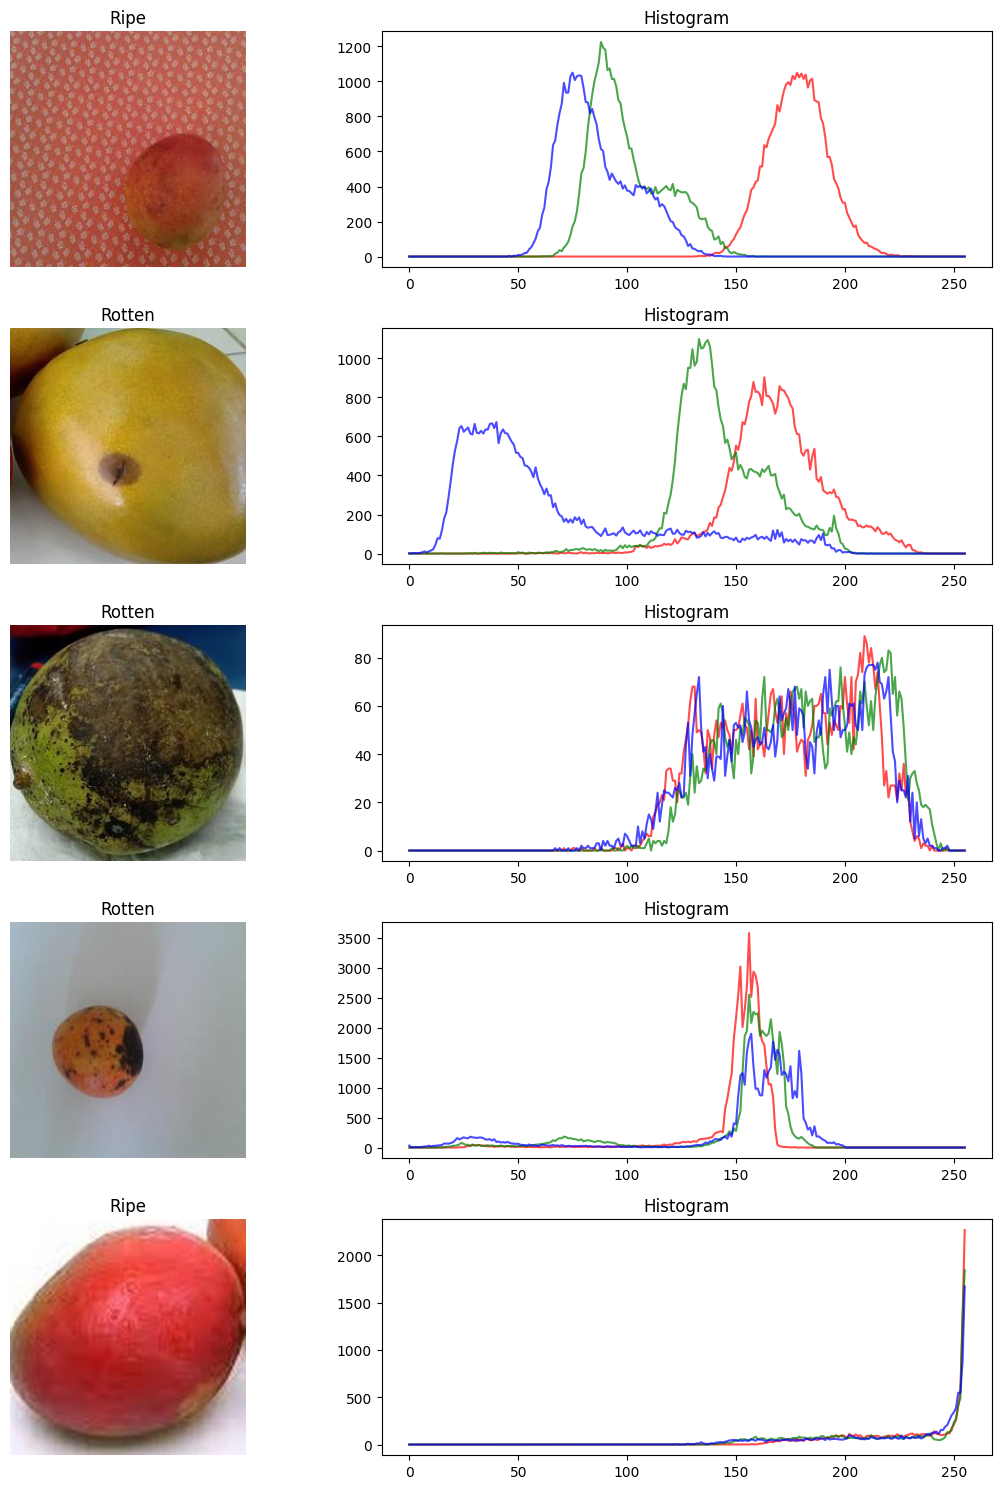

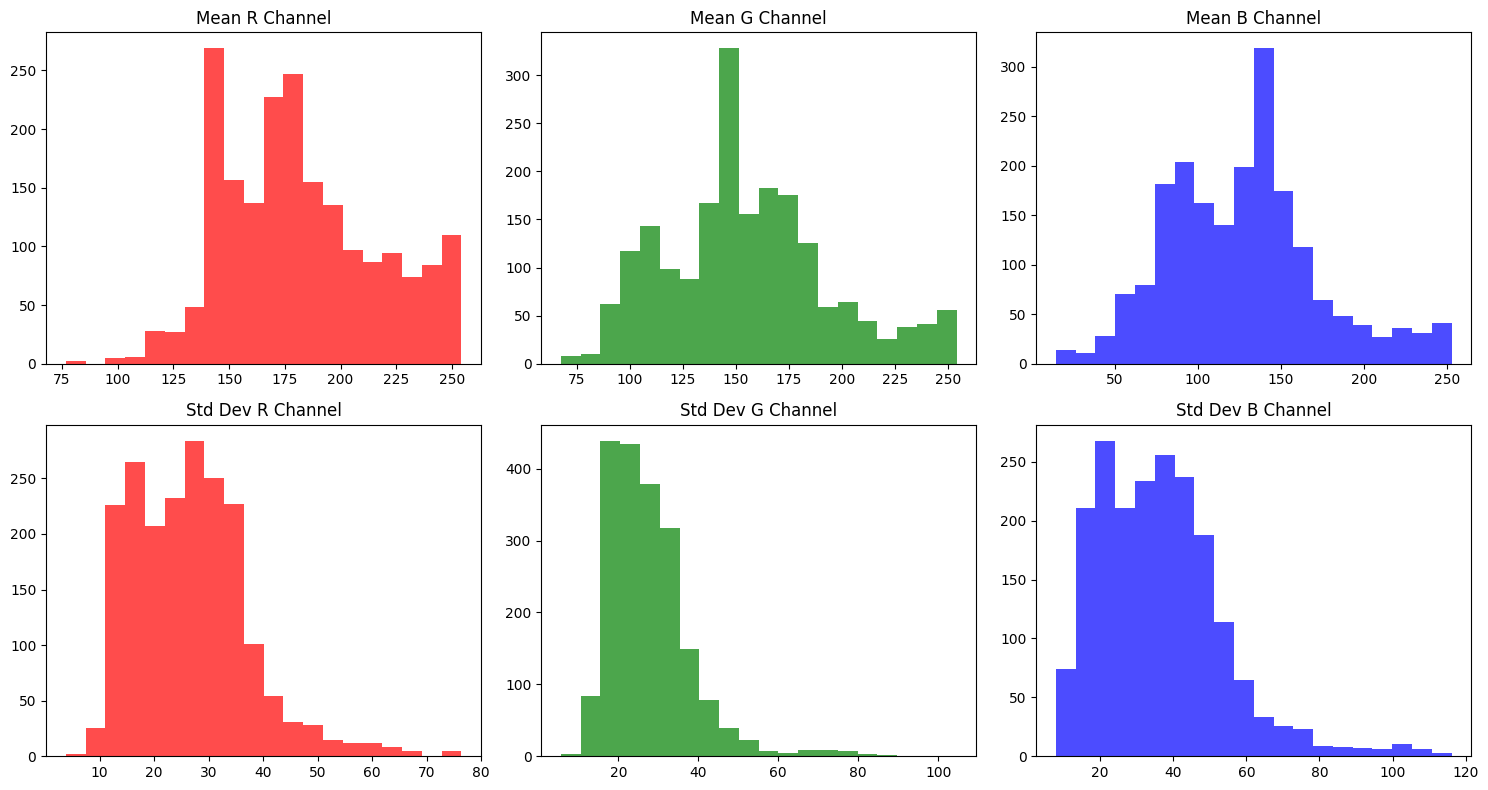

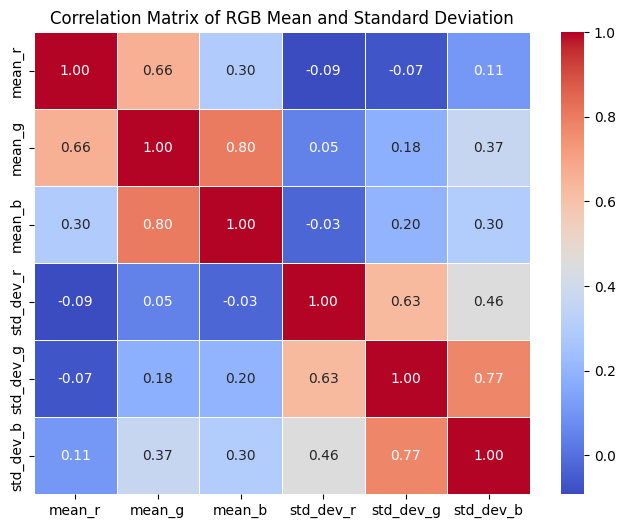

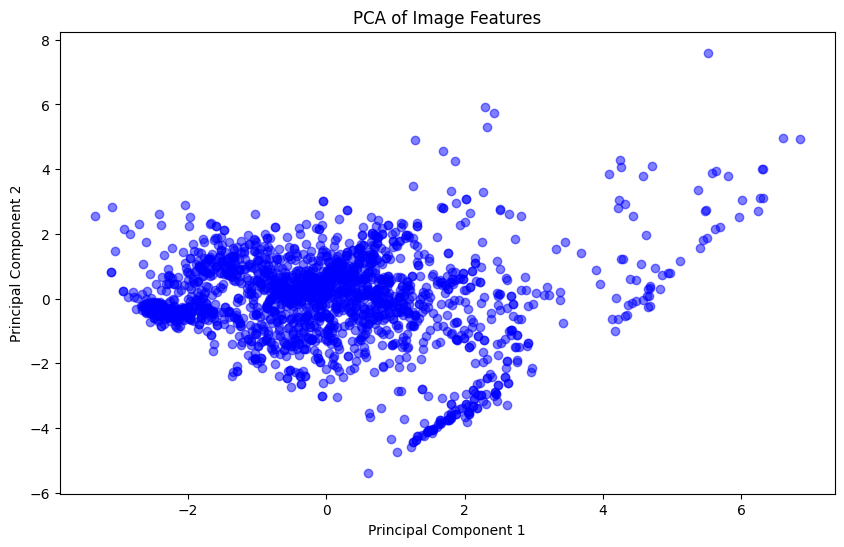

In [5]:
stats = features_data[['mean_r', 'mean_g', 'mean_b', 'std_dev_r', 'std_dev_g', 'std_dev_b']]
pca_x, pca_y = pca_data["1"], pca_data["2"]

graphic.show_samples(train_data, features_data)
graphic.show_channels(stats)
graphic.show_correlation(stats)
graphic.show_pca(pca_x, pca_y)

In [6]:
rnd = random_forest(features_data, train_data["label"])

Model trained successfully.
Accuracy: 0.9573

Classification Report:
              precision    recall  f1-score   support

        Ripe       0.99      0.85      0.91       104
      Rotten       0.95      1.00      0.97       294

    accuracy                           0.96       398
   macro avg       0.97      0.92      0.94       398
weighted avg       0.96      0.96      0.96       398

Confusion Matrix:
[[ 88  16]
 [  1 293]]
